In [6]:
# Computational imports
import math
import numpy as np
from scipy import optimize as opt

# Graphics imports
import matplotlib.pyplot as plt

In [47]:
#define a tanh with affine transformation to make it more steep

def f(x):
    return np.tanh(10*x)

def scale_up(z,x_min,x_max):
    """
    Scales up z \in [-1,1] to x \in [x_min,x_max]
    where z = (2 * (x - x_min) / (x_max - x_min)) - 1
    """
    
    return x_min + (z + 1) * (x_max - x_min) / 2


def scale_down(x,x_min,x_max):
    """
    Scales down x \in [x_min,x_max] to z \in [-1,1]
    where z = f(x) = (2 * (x - x_min) / (x_max - x_min)) - 1
    """    
    
    return (2 * (x - x_min) / (x_max - x_min)) - 1

In [48]:
x_min = -1
x_max = +1
x_grid = np.linspace(x_min,x_max,100)

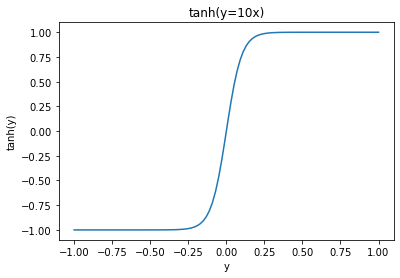

In [49]:
plt.figure()
plt.plot(x_grid,f(x_grid))
plt.title("tanh(y=10x)")
plt.xlabel("y")
plt.ylabel("tanh(y)")
plt.show()
plt.close()

In [68]:
n = 20 # order (degree, highest power) of the approximating polynomial
m = 30 # number of Chebyshev nodes (having m > n doesn't matter for the approximation it seems)

# generate chebyshev nodes (the roots of Chebyshev polynomials, a Chebyshev polynomial of degree m-1 has m roots)
r_k = -np.cos((2*np.arange(1,m+1) - 1) * np.pi / (2*m))

# or using numpy's routine
#r_k = np.polynomial.chebyshev.chebpts1(m)

In [69]:
# builds the Vandermonde matrix of Chebyshev polynomial expansion at the r_k nodes
# using the recurrence relation
T = np.zeros((m,n+1))

T[:,0] = np.ones((m,1)).T

T[:,1] = r_k.T

for i in range(1,n):
    T[:,i+1] = 2 * r_k * T[:,i] - T[:,i-1]

# or numpy's routine
#T = np.polynomial.chebyshev.chebvander(r_k,n)

In [70]:
# calculate the Chebyshev coefficients
x_k = scale_up(r_k,x_min,x_max)
y_k = f(x_k)
α = np.linalg.inv(T.T @ T) @ T.T @ y_k
α

array([ 6.93889390e-17,  1.26796679e+00, -9.42171688e-17, -4.08968011e-01,
       -7.32920669e-17,  2.30069647e-01,  1.01481323e-16, -1.49681607e-01,
        5.55111512e-17,  1.03345156e-01,  8.67361738e-17, -7.34163864e-02,
       -4.16333634e-17,  5.29535998e-02,  0.00000000e+00, -3.85541020e-02,
        2.77555756e-17,  2.82843236e-02,  0.00000000e+00, -2.09339545e-02,
        1.73472348e-17])

In [71]:
# evaluate the Chebyshev series with coefficients α_k at the points r_k
T @ α

# or with numpy's routine
#np.polynomial.chebyshev.chebval(r_k,α)

array([-0.99558485, -1.00904037, -0.99507739, -0.9956845 , -1.00996434,
       -0.99388119, -0.9954741 , -1.01233343, -0.99106056, -0.99515706,
       -1.01776858, -0.98087347, -0.9877387 , -0.94521718, -0.43055198,
        0.43055198,  0.94521718,  0.9877387 ,  0.98087347,  1.01776858,
        0.99515706,  0.99106056,  1.01233343,  0.9954741 ,  0.99388119,
        1.00996434,  0.9956845 ,  0.99507739,  1.00904037,  0.99558485])

In [72]:
# Use coefficients to compute an approximation of $f(x)$ over the grid of $x$:
T = np.zeros((len(x_grid),n+1))

T[:,0] = np.ones((len(x_grid),1)).T

z_grid = scale_down(x_grid,x_min,x_max)

T[:,1] = z_grid.T

for i in range(1,n):
    T[:,i+1] = 2 * z_grid * T[:,i] - T[:,i-1]

# compute approximation
Tf = T @ α

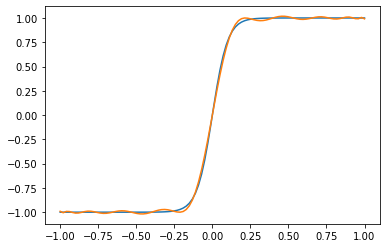

In [73]:
# make sure to use the scaled down grid inside the Chebyshev expansion
plt.figure()
plt.plot(x_grid,f(x_grid))
plt.plot(x_grid, Tf)
plt.show()
plt.close()

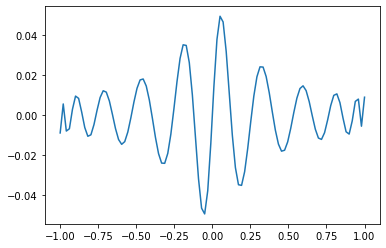

In [74]:
# plot approximation error
plt.figure()
plt.plot(x_grid,f(x_grid) - Tf)
plt.show()
plt.close()